# Convex Optimization 
# Final Project
 

Radmehr Karimian - Daniel Ayati

# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
n = 10
m = 100
Z = np.random.normal(0,1,(m,n))
B = np.random.normal(0, 1, m)
T = 4000
eta = np.array([0.01, 0.1, 1, 10])
x_start = np.zeros(n)
xs = []


In [29]:
def subgradient(x,Z,B):
    v = Z @ x - B
    sign = np.sign(v)
    return np.mean(sign.reshape((1,-1)) * Z.T, axis=1)

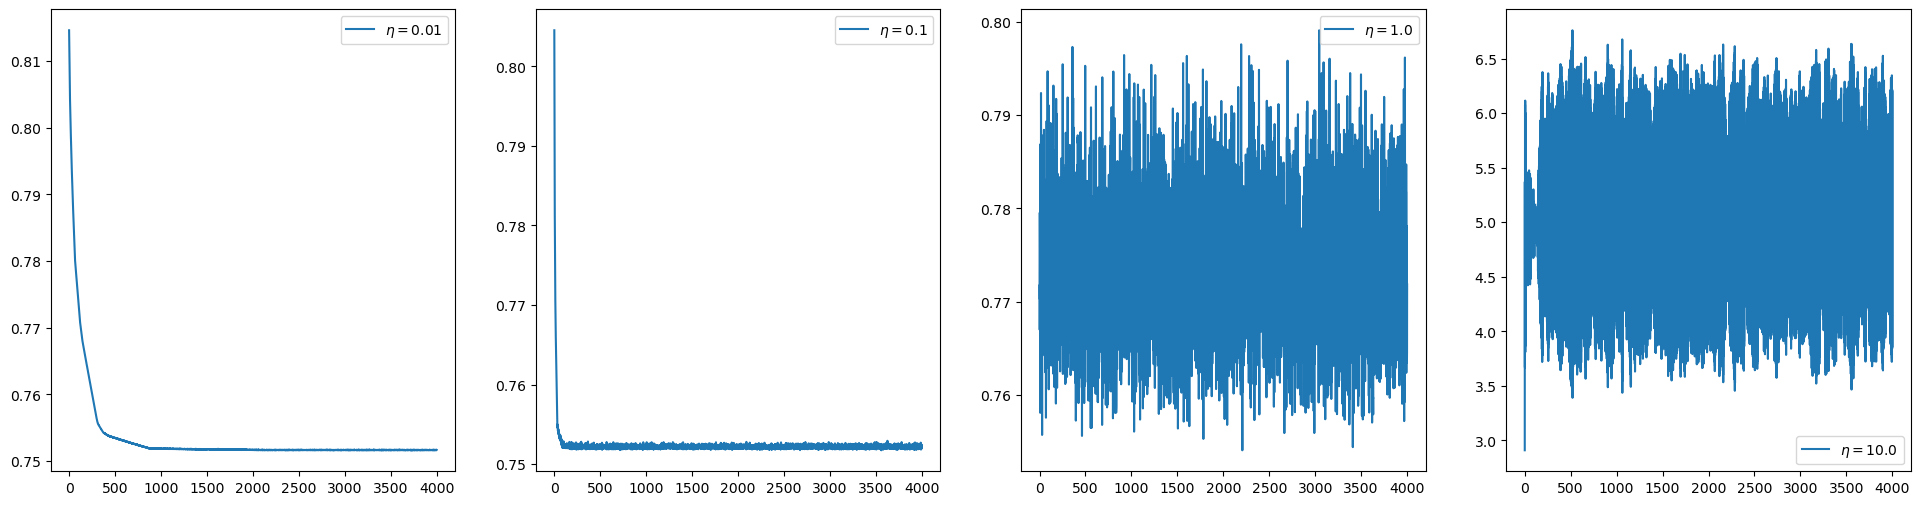

In [39]:
fig, sub = plt.subplots(1, 4, figsize=(24, 6))
for i,step_size in enumerate(eta):
    x = x_start
    xs=[]
    for j in range (T+1):
        x = x - step_size * subgradient(x,Z,B)
        xs.append(x)
    costs = [np.linalg.norm(Z@xs[t] - B, 1)/m for t in range(T+1)]
    sub[i].plot(range(T+1), costs, label=f'$\eta={step_size}$')
    sub[i].legend()
        

# Problem 2

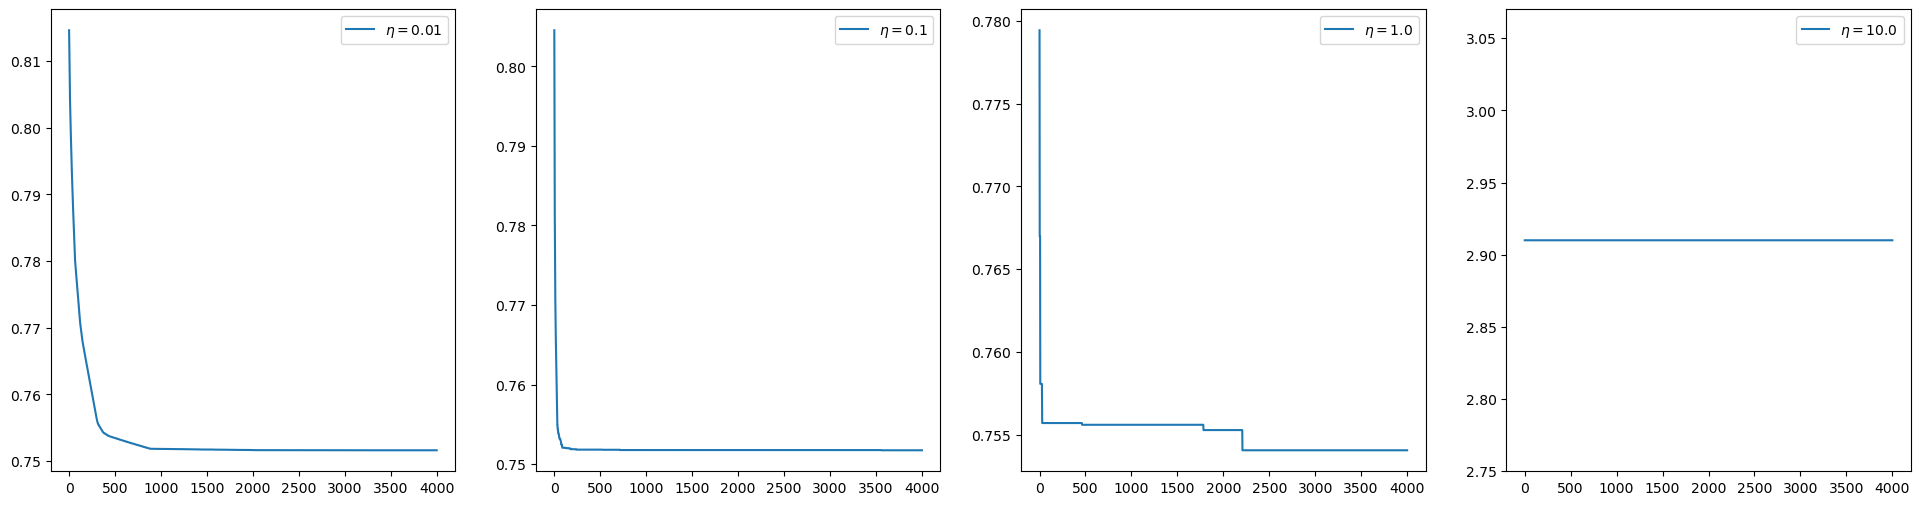

In [40]:
fig, sub = plt.subplots(1, 4, figsize=(24, 6))
for i,step_size in enumerate(eta):
    x = x_start
    xs=[]
    for j in range (T+1):
        x = x - step_size * subgradient(x,Z,B)
        xs.append(x)
    costs = [np.linalg.norm(Z@xs[t] - B, 1)/m for t in range(T+1)]
    sub[i].plot(range(T+1),[min(costs[:i]) for i in range(1, T+2)], label=f'$\eta={step_size}$')
    sub[i].legend()
        

# Problem 3

In [44]:
def stochastic_subgradient(x,Z,B) : 
    v = subgradient(x,Z,B)
    return v + np.array([np.random.normal(0,.01 * abs(v[i])) for i in range(v.shape[0])])

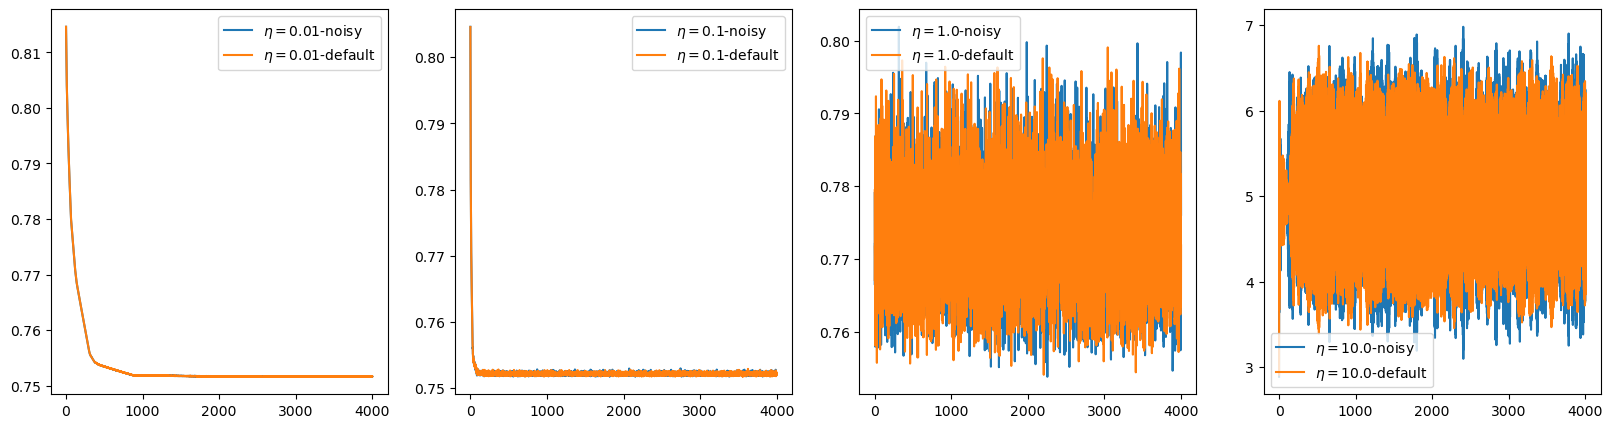

In [48]:
fig, sub = plt.subplots(1, 4, figsize=(20, 5))
for i,step_size in enumerate(eta):
    x = x_start
    xs=[]
    for j in range (T+1):
        x = x - step_size * stochastic_subgradient(x,Z,B)
        xs.append(x)
    stochastic_costs = [np.linalg.norm(Z@xs[t] - B, 1)/m for t in range(T+1)]
    x = x_start
    xs=[]
    for j in range (T+1):
        x = x - step_size * subgradient(x,Z,B)
        xs.append(x)
    costs = [np.linalg.norm(Z@xs[t] - B, 1)/m for t in range(T+1)]
    sub[i].plot(range(T+1), stochastic_costs, label=f'$\eta={step_size}$-noisy')
    sub[i].plot(range(T+1), costs, label=f'$\eta={step_size}$-default')
    sub[i].legend()


# Problem 4

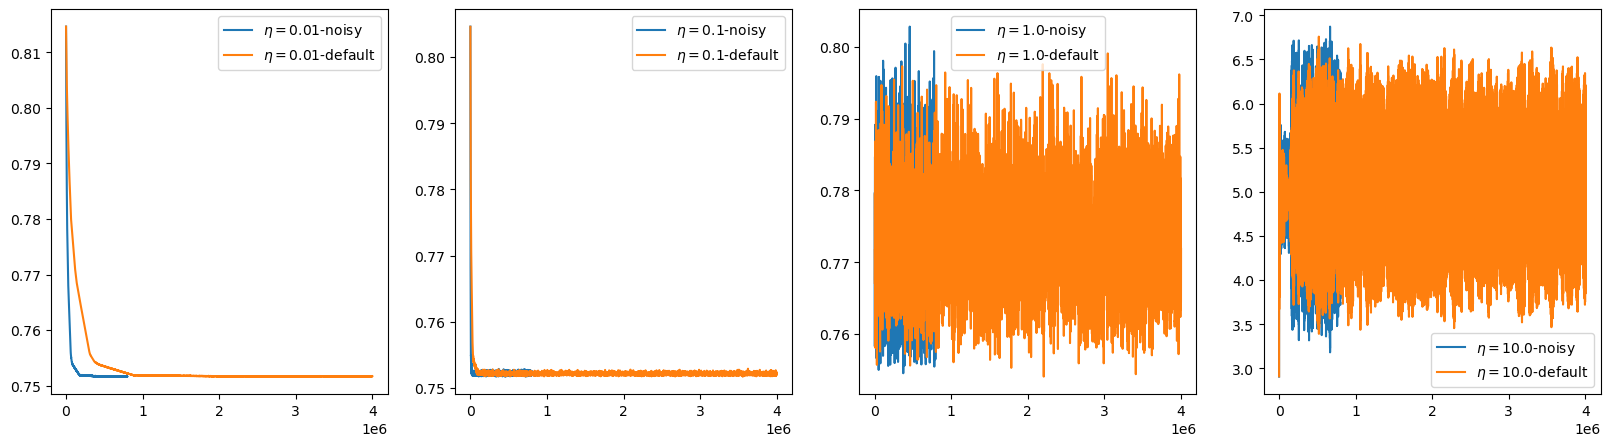

In [50]:
fig, sub = plt.subplots(1, 4, figsize=(20, 5))
for i,step_size in enumerate(eta):
    x = x_start
    xs=[]
    calculations = 20 * n * np.arange(T + 1)
    for j in range (T+1):
        x = x - step_size * stochastic_subgradient(x,Z,B)
        xs.append(x)
    stochastic_costs = [np.linalg.norm(Z@xs[t] - B, 1)/m for t in range(T+1)]
    sub[i].plot(calculations, stochastic_costs, label=f'$\eta={step_size}$-noisy')
    x = x_start
    xs=[]
    calculations = m * n * np.arange(T + 1)
    for j in range (T+1):
        x = x - step_size * subgradient(x,Z,B)
        xs.append(x)
    costs = [np.linalg.norm(Z@xs[t] - B, 1)/m for t in range(T+1)]
    sub[i].plot(calculations, costs, label=f'$\eta={step_size}$-default')
    sub[i].legend()

# Problem 5

In [53]:
import pandas as pd
dataset = pd.read_csv('/Users/apple/Downloads/house_data.csv')

In [67]:
dataset.head()

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price
0,152,1,3,3,0,0,0,0,1,981653.9936
1,142,1,2,23,0,0,1,0,0,870284.3499
2,64,1,2,26,0,0,0,0,1,515868.5989
3,156,2,3,37,0,0,0,0,1,979655.8731
4,121,4,2,24,0,0,1,0,0,859453.6265


In [56]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

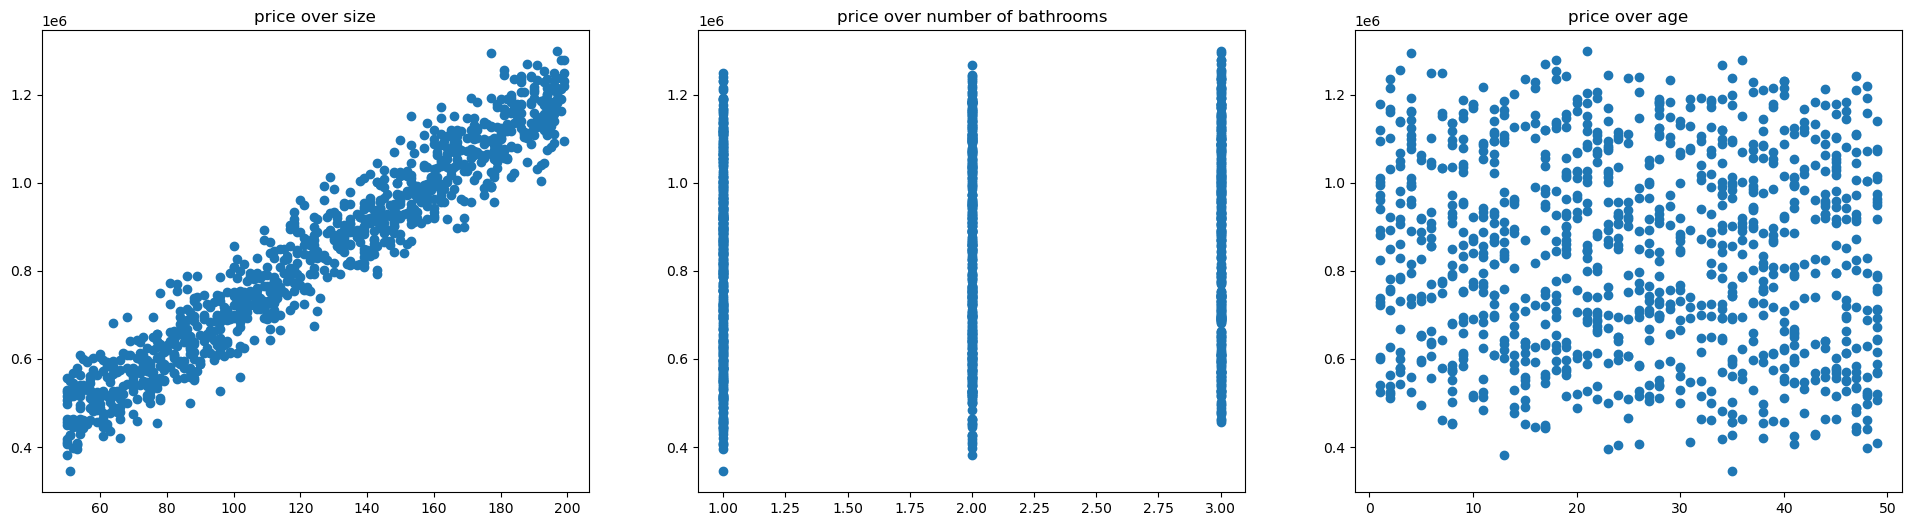

In [59]:
fig, sub = plt.subplots(1, 3, figsize=(24,6))
sub[0].scatter(dataset['size'], dataset.price)
sub[0].title.set_text('price over size')
sub[1].scatter(dataset['bathrooms'], dataset.price)
sub[1].title.set_text('price over number of bathrooms')
sub[2].scatter(dataset['age'], dataset.price)
sub[2].title.set_text('price over age')


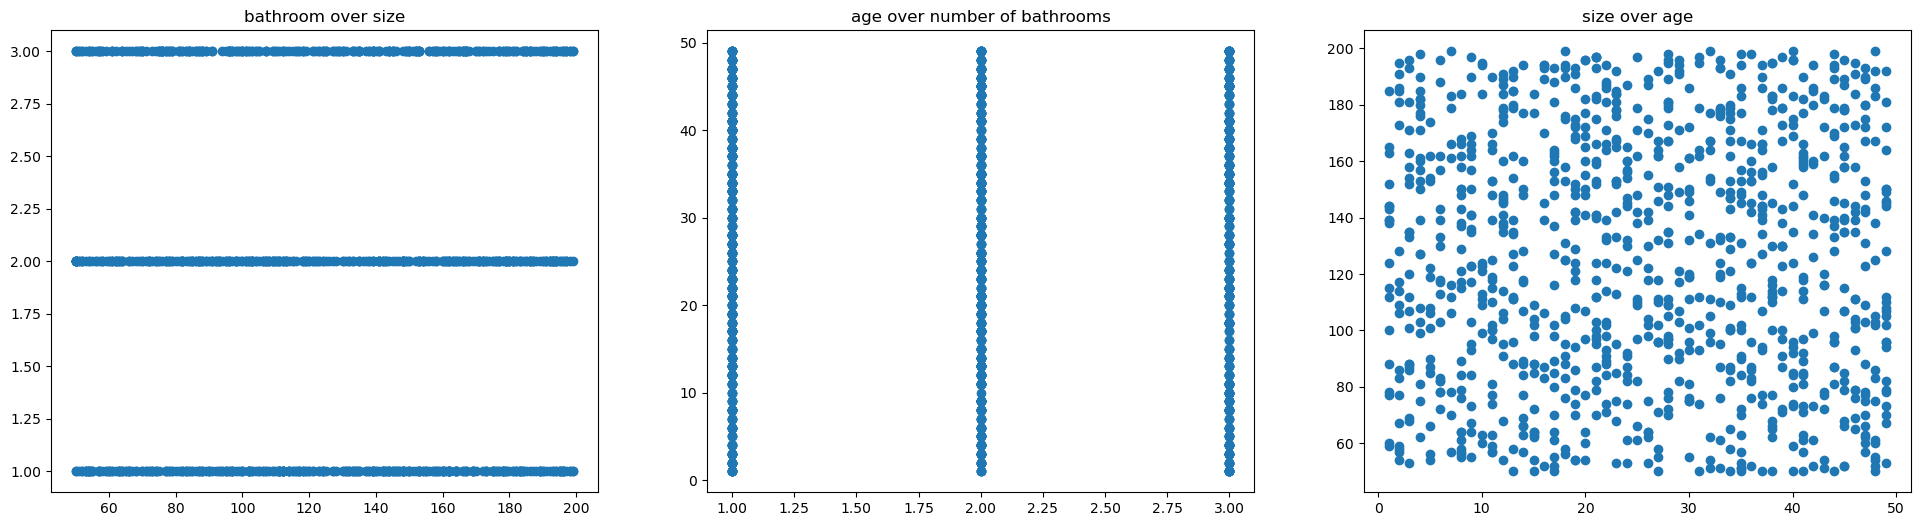

In [60]:
fig, sub = plt.subplots(1, 3, figsize=(24,6))
sub[0].scatter(dataset['size'], dataset['bathrooms'])
sub[0].title.set_text('bathroom over size')
sub[1].scatter(dataset['bathrooms'], dataset['age'])
sub[1].title.set_text('age over number of bathrooms')
sub[2].scatter(dataset['age'],dataset['size'])
sub[2].title.set_text('size over age')


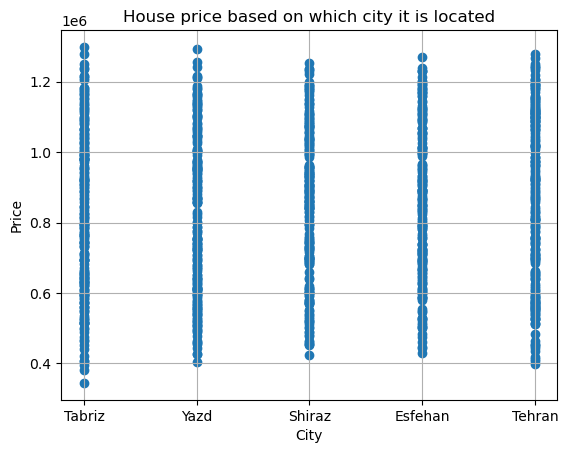

In [66]:
city = []
for i in range(dataset.shape[0]):
    if dataset['Tehran'].iloc[i] == 1:
        city.append('Tehran')
    elif dataset['Esfehan'].iloc[i] == 1:
        city.append('Esfehan')
    elif dataset['Yazd'].iloc[i] == 1:
        city.append('Yazd')
    elif dataset['Shiraz'].iloc[i] == 1:
        city.append('Shiraz')
    else:
        city.append('Tabriz')
plt.figure()
plt.scatter(city,dataset['price'])
plt.title('House price based on which city it is located')
plt.xlabel(r'City')
plt.ylabel(r'Price')
plt.grid(True)

# Problem 6

In [72]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2)

In [73]:
mean = train.mean()
std = train.std()
train = (train - mean) / std
mean = test.mean()
std = test.std()
test = (test - mean) / std

In [75]:
train.head()

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price
206,-0.366300,-0.422480,1.331364,-0.746735,-0.52495,2.097594,-0.487947,-0.505536,-0.503588,0.150183
73,-1.400885,0.471658,1.331364,0.023817,-0.52495,2.097594,-0.487947,-0.505536,-0.503588,-1.387200
496,1.059127,1.365797,0.078316,-1.587338,-0.52495,-0.476141,-0.487947,-0.505536,1.983267,0.914339
236,1.518943,-0.422480,1.331364,-0.956886,-0.52495,-0.476141,-0.487947,1.975624,-0.503588,1.370611
840,-0.274337,-1.316619,0.078316,-0.186334,-0.52495,-0.476141,-0.487947,1.975624,-0.503588,-0.609352


In [76]:
test.head()

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price
598,1.170371,0.478182,1.141456,1.273339,1.878225,-0.467349,-0.467349,-0.522031,-0.506530,1.154621
896,-0.947443,-1.343464,-0.066434,1.345036,-0.529756,-0.467349,-0.467349,1.906019,-0.506530,-1.230934
734,1.014322,-1.343464,-0.066434,1.560127,-0.529756,-0.467349,-0.467349,-0.522031,1.964347,0.468050
544,1.393299,1.389005,-0.066434,-0.160601,-0.529756,-0.467349,2.129032,-0.522031,-0.506530,1.181360
318,-0.657637,1.389005,-0.066434,-0.303995,-0.529756,-0.467349,-0.467349,1.906019,-0.506530,-0.505748


# Problem 7

In [229]:
def MSE(w, b, x, y):
    prediction = x @ w + b
    
    return np.mean((prediction - y) ** 2)

# Problem 8

In [230]:
def Update_weights(w, b, x, y, eta):
    y_hat = x @ w + b
    diff = y_hat - y
    w_ = 2 * np.mean(diff.reshape((-1,1)) * x, axis=0).reshape((-1,1))
    b_ = 2 * diff.mean()
    
    return (w - eta * w_, b - eta * b_,(w_, b_), eta)


# Problem 9

In [231]:
def get_data(dataframe):
    return dataframe.values[:,:-1], dataframe.values[:,-1]
def data_batch(dataset, size):
    length = dataset.__len__()
    indices = np.random.permutation(length)
    batch_n = length // size
    batch_indices = [indices[i * size:min(length, (i+1)*size)] for i in range(batch_n)]
    batches = []
    for i in range(batch_n):
        x, y = get_data(dataset.iloc[batch_indices[i]])
        batches.append((x,y.reshape((-1,1))))
    return batches

In [289]:
loss = []
loss2 = []
epoch = 5
batch = 16
w_0, b_0 = np.random.random((train.values.shape[1] - 1,1))-.5, np.random.random((1,1))

In [290]:
w,b = w_0, b_0
w_old, b_old = w_0, b_0
batch_history =[]
for epoch in range(epoch):
    batches = data_batch(train, batch)
    # print(epoch)
    for t,(batch_feature,batch_y) in enumerate(batches):
        eta=.001
        new_w, new_b, new_grads, eta = Update_weights(w,b,batch_feature, batch_y,eta)
        
        batch_history.append((new_w, new_b))
        w_old, b_old = w, b
        w, b = new_w, new_b
    losses = (MSE(*batch_history[-1], train.values[:,:-1], train.values[:,-1]))
    loss.append(losses)
    losses = (MSE(*batch_history[-1], test.values[:,:-1], test.values[:,-1]))
    loss2.append(losses)

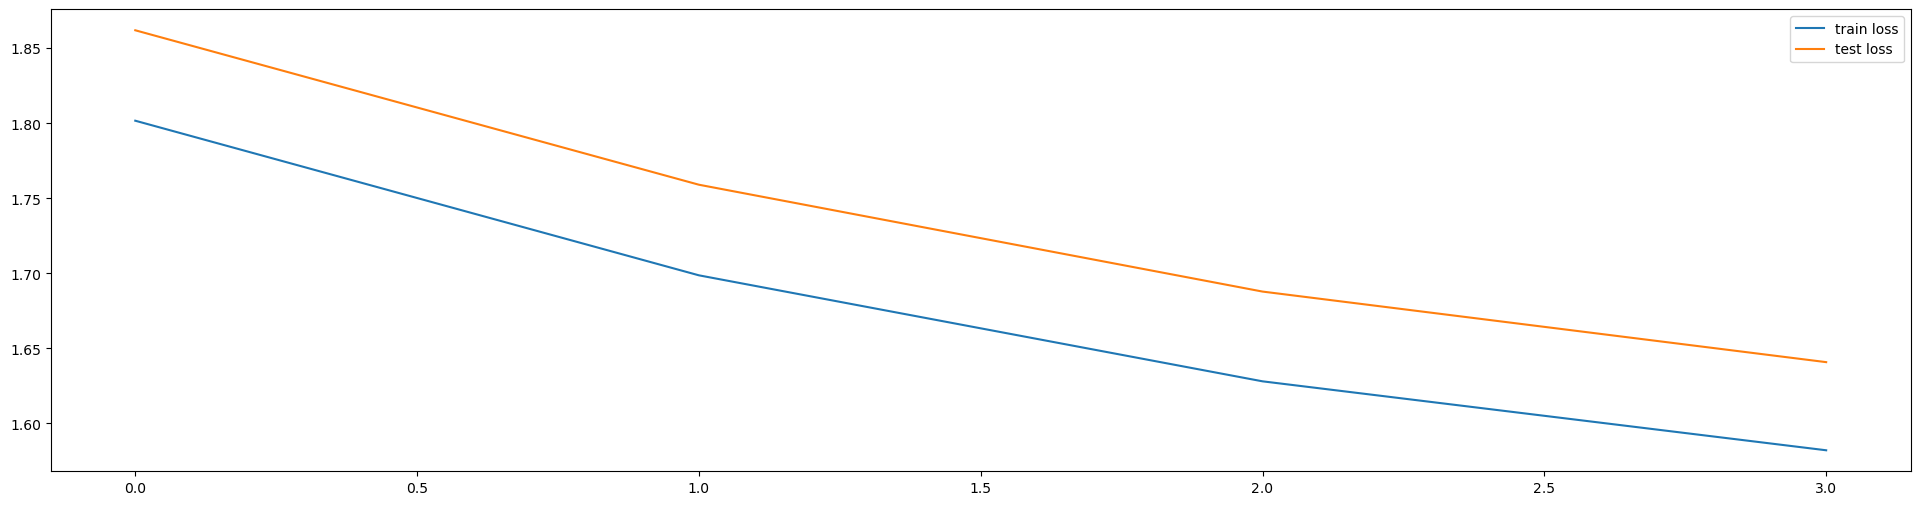

In [291]:
plt.figure(figsize=(24,6))
plt.plot(range(epoch), [loss[i] for i in range(epoch)], label='train loss')
plt.plot(range(epoch), [loss2[i] for i in range(epoch)], label='test loss')
plt.legend()

In [292]:
print("testloss :",(MSE(*batch_history[-1], test.values[:,:-1], train.values[:,-1])))

testloss : 1.6162564480582442
